In [23]:
#Import packages
import pandas as pd
import numpy as np
import urllib.request # to request URLs and get the HTML from it
import requests
import string
import matplotlib.pyplot as plt
import schedule
import time
import plotly.express as px
from sklearn import linear_model
import statsmodels.api as sm

In [24]:
#Read the csv file that the province of Ontario updates daily
data = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtestin')
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Check columns
data.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases',
       'Total patients approved for testing as of Reporting Date',
       'Total tests completed in the last day',
       'Percent positive tests in last day', 'Under Investigation',
       'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19',
       'Total Positive LTC Resident Cases', 'Total Positive LTC HCW Cases',
       'Total LTC Resident Deaths', 'Total LTC HCW Deaths'],
      dtype='object')

In [26]:
# Check data types
data.dtypes

Reported Date                                                object
Confirmed Negative                                          float64
Presumptive Negative                                        float64
Presumptive Positive                                        float64
Confirmed Positive                                          float64
Resolved                                                    float64
Deaths                                                      float64
Total Cases                                                 float64
Total patients approved for testing as of Reporting Date    float64
Total tests completed in the last day                       float64
Percent positive tests in last day                          float64
Under Investigation                                           int64
Number of patients hospitalized with COVID-19               float64
Number of patients in ICU with COVID-19                     float64
Number of patients in ICU on a ventilator with C

In [27]:
# convert the 'Date' column to datetime format 
data['Reported Date']= pd.to_datetime(data['Reported Date']) 

In [28]:
# Check numm values
data.isnull().sum()

Reported Date                                                 0
Confirmed Negative                                          285
Presumptive Negative                                        320
Presumptive Positive                                        307
Confirmed Positive                                            2
Resolved                                                     12
Deaths                                                       40
Total Cases                                                   2
Total patients approved for testing as of Reporting Date      6
Total tests completed in the last day                        69
Percent positive tests in last day                           73
Under Investigation                                           0
Number of patients hospitalized with COVID-19                56
Number of patients in ICU with COVID-19                      56
Number of patients in ICU on a ventilator with COVID-19      56
Total Positive LTC Resident Cases       

In [29]:
#Replace na with 0
data = data.fillna(0)
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Percent positive tests in last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-28,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-30,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Rename column names
data = data.rename(columns={'Confirmed Positive': 'Positive Cases', 'Number of patients hospitalized with COVID-19':'Hospitalization', 'Number of patients in ICU with COVID-19':'Enter ICU', 'Number of patients in ICU on a ventilator with COVID-19':'ICU on ventilator', 'Total tests completed in the last day':'Total tests completed'})

In [31]:
#Create a dataframe
new_data = data[['Reported Date', 'Positive Cases', 'Total Cases', 'Deaths','Hospitalization', 'Enter ICU', 'ICU on ventilator', 'Total tests completed']]
new_data.head()

,Reported Date,Positive Cases,Total Cases,Deaths,Hospitalization,Enter ICU,ICU on ventilator,Total tests completed
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-28,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-30,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Import calculations
new_data['New Cases'] = new_data['Total Cases'].diff()
new_data['New Patients Hospitalized']=new_data['Hospitalization'].diff()
new_data['New Patients in ICU'] = new_data['Enter ICU'].diff()
new_data['New Patients on ventilator'] = new_data['ICU on ventilator'].diff()
new_data['New Deaths'] = new_data['Deaths'].diff()
new_data['Positivity Rate'] = (new_data['Positive Cases']/new_data['Total Cases'])*100

/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [33]:
#Replace infinite and NAN with 0
new_data = new_data.replace([np.inf, -np.inf], np.nan)
new_data = new_data.fillna(0)

In [34]:
#Create new dataframe of important information
data_new = new_data[['Reported Date','New Cases', 'New Patients Hospitalized','New Patients in ICU', 'New Patients on ventilator', 'New Deaths','Positive Cases', 'Total Cases']]
data_new.tail()

,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases
327,2020-12-29,2553.0,-11.0,8.0,-4.0,41.0,19891.0,175908.0
328,2020-12-30,2923.0,313.0,19.0,-3.0,19.0,20558.0,178831.0
329,2020-12-31,3328.0,58.0,14.0,6.0,56.0,21617.0,182159.0
330,2021-01-01,2476.0,25.0,-1.0,11.0,51.0,21582.0,184635.0
331,2021-01-02,3363.0,-257.0,-14.0,-1.0,44.0,22847.0,187998.0


In [35]:
dataa = data_new
dataa = dataa.set_index('Reported Date')
dataa.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases
Reported Date,,,,,,,
2020-12-29,2553.0,-11.0,8.0,-4.0,41.0,19891.0,175908.0
2020-12-30,2923.0,313.0,19.0,-3.0,19.0,20558.0,178831.0
2020-12-31,3328.0,58.0,14.0,6.0,56.0,21617.0,182159.0
2021-01-01,2476.0,25.0,-1.0,11.0,51.0,21582.0,184635.0
2021-01-02,3363.0,-257.0,-14.0,-1.0,44.0,22847.0,187998.0


In [36]:
#Replace negative values with 0
dataa[dataa < 0] = 0
dataa.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases
Reported Date,,,,,,,
2020-12-29,2553.0,0.0,8.0,0.0,41.0,19891.0,175908.0
2020-12-30,2923.0,313.0,19.0,0.0,19.0,20558.0,178831.0
2020-12-31,3328.0,58.0,14.0,6.0,56.0,21617.0,182159.0
2021-01-01,2476.0,25.0,0.0,11.0,51.0,21582.0,184635.0
2021-01-02,3363.0,0.0,0.0,0.0,44.0,22847.0,187998.0


In [37]:
#Positivity Rate
dataa['Positivity Rate'] = (dataa['Positive Cases']/dataa['Total Cases'])*100

Text(0.5, 1.0, 'Daily New Cases')

<Figure size 432x288 with 0 Axes>

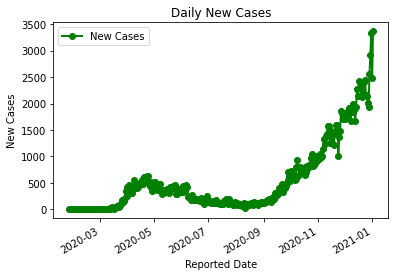

In [38]:
# plotting the daily new cases
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Cases',color='green', linewidth=2, marker='o', legend=True)
plt.ylabel('New Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('Daily New Cases')

Text(0.5, 1.0, 'New Patients Hospitalized')

<Figure size 432x288 with 0 Axes>

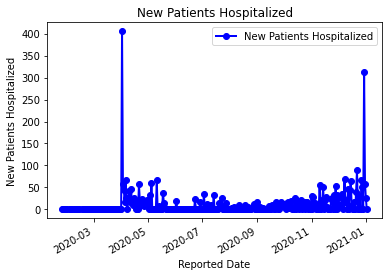

In [39]:
# plotting the daily new patients hospitalization
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients Hospitalized',color='blue', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients Hospitalized')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients Hospitalized')

Text(0.5, 1.0, 'New Patients in ICU')

<Figure size 432x288 with 0 Axes>

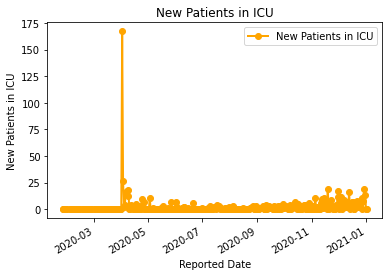

In [40]:
# plotting the daily new patients in ICU
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients in ICU',color='orange', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients in ICU')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients in ICU')

Text(0.5, 1.0, 'New Patients in ICU')

<Figure size 432x288 with 0 Axes>

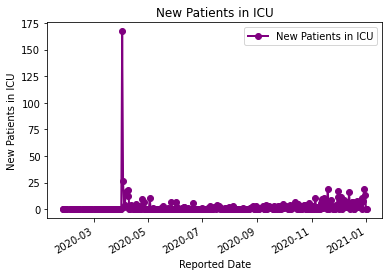

In [41]:
# plotting the daily new patients on ventialtor
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Patients in ICU',color='purple', linewidth=2, marker='o', legend=True)
plt.ylabel('New Patients in ICU')
# Make sure you change the title of the figure accordingly. 
plt.title('New Patients in ICU')

Text(0.5, 1.0, 'New Deaths')

<Figure size 432x288 with 0 Axes>

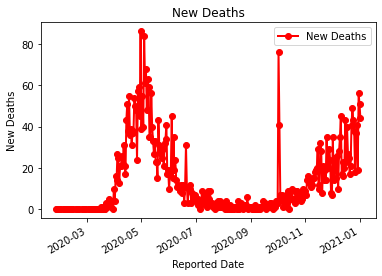

In [42]:
# plotting the daily new deaths
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='New Deaths',color='red', linewidth=2, marker='o', legend=True)
plt.ylabel('New Deaths')
# Make sure you change the title of the figure accordingly. 
plt.title('New Deaths')

Text(0.5, 1.0, 'Total Cases')

<Figure size 432x288 with 0 Axes>

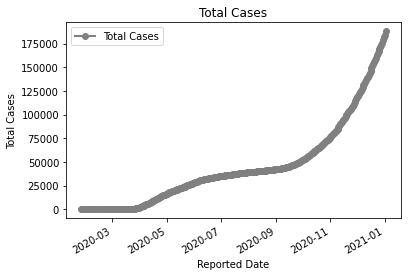

In [43]:
# plotting the daily new deaths
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='Total Cases',color='grey', linewidth=2, marker='o', legend=True)
plt.ylabel('Total Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('Total Cases')

Text(0.5, 1.0, 'Positivity Rate')

<Figure size 432x288 with 0 Axes>

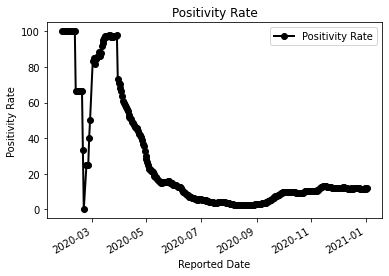

In [44]:
# plotting the daily new patients on ventialtor
fig = plt.figure()  # initiate the figure environment
dataa.plot(y='Positivity Rate',color='black', linewidth=2, marker='o', legend=True)
plt.ylabel('Positivity Rate')
# Make sure you change the title of the figure accordingly. 
plt.title('Positivity Rate')

### 7 day moving average

In [45]:
#Create new dataframe
new_dataa = data_new
new_dataa.tail()

,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases
327,2020-12-29,2553.0,-11.0,8.0,-4.0,41.0,19891.0,175908.0
328,2020-12-30,2923.0,313.0,19.0,-3.0,19.0,20558.0,178831.0
329,2020-12-31,3328.0,58.0,14.0,6.0,56.0,21617.0,182159.0
330,2021-01-01,2476.0,25.0,-1.0,11.0,51.0,21582.0,184635.0
331,2021-01-02,3363.0,-257.0,-14.0,-1.0,44.0,22847.0,187998.0


In [46]:
#Create a column that has the end of week
from pandas.tseries.offsets import *
new_dataa['Reported Week'] = new_dataa['Reported Date'] + Week(weekday=6)
new_dataa.head()

/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Reported Date,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases,Reported Week
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-02
1,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-02
2,2020-01-28,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2020-02-02
3,2020-01-30,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2020-02-02
4,2020-01-31,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2020-02-02


In [47]:
#Find the averages per week
#This gives us a better outlook on the week compated to daily shock increases

data2 = new_dataa[['Reported Week','New Cases','New Patients Hospitalized','New Patients in ICU', 'New Patients on ventilator', 'New Deaths','Positive Cases', 'Total Cases']]
data2 = data2.set_index('Reported Week')

In [48]:
#Replace negative values with 0
data2[data2 < 0] = 0
data2.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases
Reported Week,,,,,,,
2021-01-03,2553.0,0.0,8.0,0.0,41.0,19891.0,175908.0
2021-01-03,2923.0,313.0,19.0,0.0,19.0,20558.0,178831.0
2021-01-03,3328.0,58.0,14.0,6.0,56.0,21617.0,182159.0
2021-01-03,2476.0,25.0,0.0,11.0,51.0,21582.0,184635.0
2021-01-03,3363.0,0.0,0.0,0.0,44.0,22847.0,187998.0


In [49]:
#Calculate Positivity Rate
#Positivity Rate
data2['Positivity Rate'] = (data2['Positive Cases']/data2['Total Cases'])*100

In [50]:
# Group by index and the average
data2 = round(data2.groupby(['Reported Week']).mean(),0)
data2.tail()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases,Positivity Rate
Reported Week,,,,,,,,
2020-12-06,1764.0,18.0,8.0,4.0,19.0,14576.0,120002.0,12.0
2020-12-13,1874.0,25.0,5.0,6.0,25.0,16080.0,132882.0,12.0
2020-12-20,2159.0,20.0,5.0,4.0,27.0,17191.0,146724.0,12.0
2020-12-27,2257.0,23.0,4.0,11.0,33.0,19384.0,162670.0,12.0
2021-01-03,2655.0,74.0,7.0,6.0,38.0,20853.0,179186.0,12.0


In [51]:
# View the basic statistics of each variable
data2.describe()

,New Cases,New Patients Hospitalized,New Patients in ICU,New Patients on ventilator,New Deaths,Positive Cases,Total Cases,Positivity Rate
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,548.142857,10.265306,2.326531,2.224490,13.469388,4721.510204,45217.979592,26.489796
std,664.746976,15.194264,4.375061,3.737564,15.250822,5408.260865,44508.474760,31.251082
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,113.000000,1.000000,0.000000,0.000000,1.000000,1183.000000,12305.000000,6.000000
50%,338.000000,5.000000,1.000000,1.000000,6.000000,3013.000000,37063.000000,12.000000
75%,694.000000,13.000000,2.000000,3.000000,23.000000,5506.000000,56176.000000,33.000000
max,2655.000000,74.000000,28.000000,22.000000,60.000000,20853.000000,179186.000000,100.000000


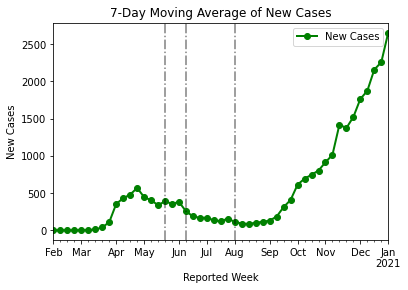

In [52]:
# plotting the average new cases per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data2['New Cases'].plot(color='green', linewidth=2, marker='o', legend=True)
plt.ylabel('New Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('7-Day Moving Average of New Cases')
# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

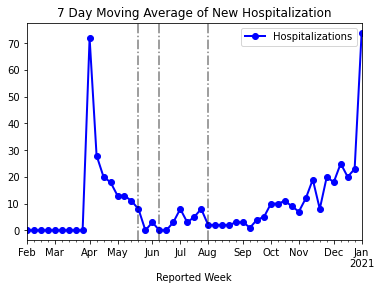

In [53]:
# plotting the average hospitalizations per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data2['New Patients Hospitalized'].plot(label='Hospitalizations',kind="line", legend=True, linewidth=2, marker='o', color='blue')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average of New Hospitalization')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

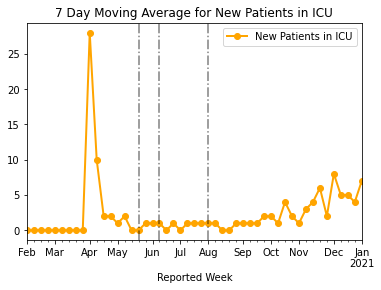

In [54]:
# plotting the average entering the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['New Patients in ICU'].plot(label='New Patients in ICU',kind="line", legend=True, linewidth=2, marker='o', color='orange')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average for New Patients in ICU')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

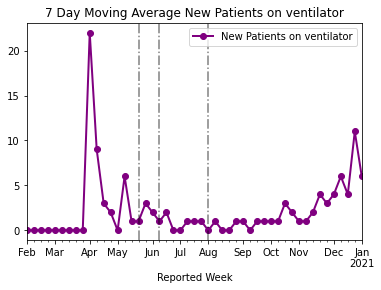

In [55]:
# plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['New Patients on ventilator'].plot(label='New Patients on ventilator',kind="line", legend=True, linewidth=2, marker='o', color='purple')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average New Patients on ventilator')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

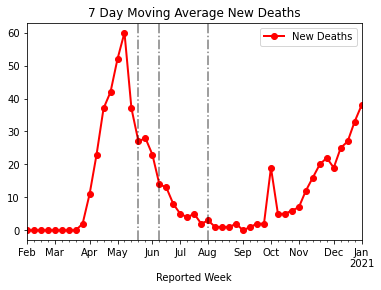

In [56]:
#plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['New Deaths'].plot(label='New Deaths',kind="line", legend=True, linewidth=2, marker='o', color='red')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average New Deaths')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

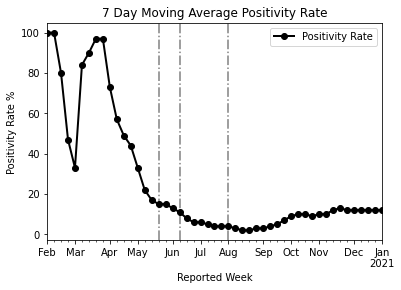

In [57]:
# plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data2['Positivity Rate'].plot(label='Positivity Rate',kind="line", legend=True, linewidth=2, marker='o', color='black')

# Make sure you change the title of the figure accordingly. 
plt.title('7 Day Moving Average Positivity Rate')
plt.ylabel('Positivity Rate %')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

### Regression Modelling

#### Constructing a simple regression model that is setting hospitalization as a function of new cases. Therefore we are assuming that as new cases increase, patients admitted into hospitalization will increase.

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [59]:
covid = data2.rename(columns={'New Cases': 'New_Cases', 'New Patients Hospitalized':'Hospitalization', 'New Patients in ICU':'Enter_ICU', 'New Patients on ventilator':'Ventilator', 'New Deaths':'New_Deaths', 'Positivity Rate':'Positivity_Rate'})
covid = covid.reset_index()

In [60]:
# predictor variable (x) and dependent variable (y)
x = covid[['New_Cases']]
y = covid[['Hospitalization']]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        Hospitalization   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.550
Method:                 Least Squares   F-statistic:                              60.86
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                    4.40e-10
Time:                        10:49:14   Log-Likelihood:                         -191.66
No. Observations:                  49   AIC:                                      385.3
Df Residuals:                      48   BIC:                                      387.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Adj. R-squared indicates that ~52% of hospitalization can be explained by our predictor variable, new cases

#### The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in new cases increases hospitalizations by 0.0155. This is in line with our initial assumption that as new cases increase, hospitalization increases.

#### The standard error measures the accuracy of new cases coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard error, 0.002, is low and therefore appears accurate.

#### The p-value means the probability of an 0.0155 increase in hospitalization is due to a one unit increase in new cases, which is at 0.002. This is assuming that there is no relationship between the two variables. A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 5%.

#### The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that new cases coefficient will be within our confidence interval, [0.011	0.020]

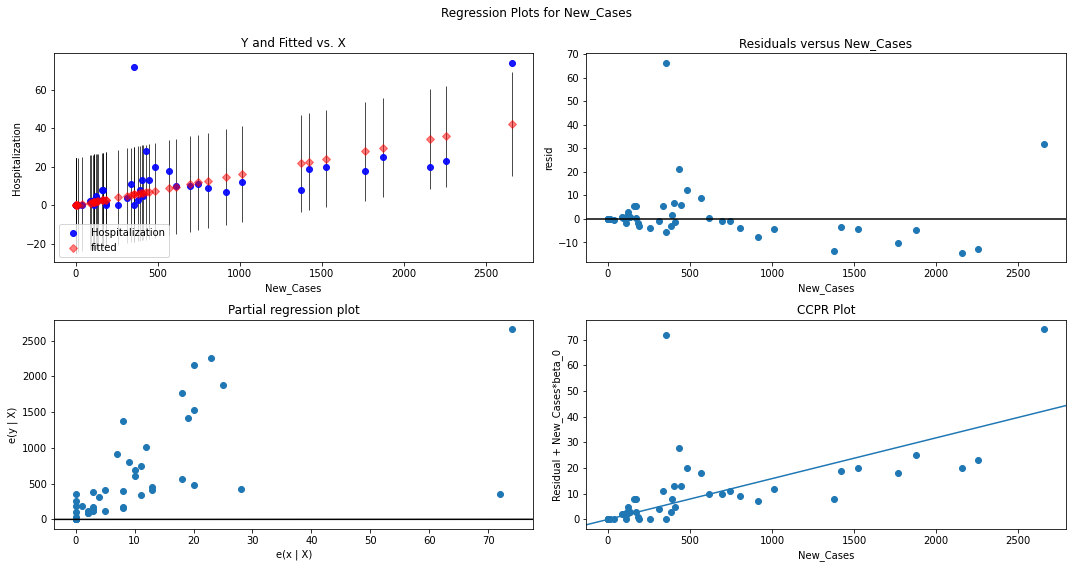

In [61]:
# This produces our four regression plots for New Cases

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "New_Cases", fig=fig)

#### 1. The “Y and Fitted vs. X” graph plots the dependent variable against our predicted values with a confidence interval. The inverse relationship in our graph indicates that hospitalization and new cases are positively correlated, i.e., when one variable increases the other increases

#### 2. The “Residuals versus New Cases” graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds. Homoskedasticity assumption that assumes that different samples have the same variance, even if they came from different population.

#### 3. The “Partial regression plot” shows the relationship between hospitalizations and new cases, taking into account the impact of adding other independent variables on our existing new cases coefficient. We'll see later how this same graph changes when we add more variables.

#### 4. The Component and Component Plus Residual (CCPR) plot is an extension of the partial regression plot, but shows where our trend line would lie after adding the impact of adding our other independent variables on our existing new cases coefficient.

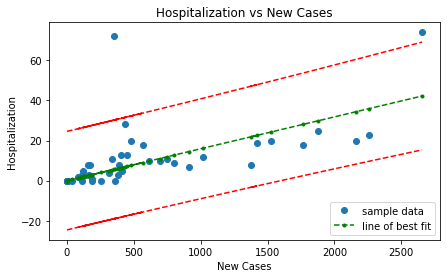

In [62]:
# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(7,4))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="sample data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="line of best fit")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot title
plt.title("Hospitalization vs New Cases")
plt.xlabel("New Cases")
plt.ylabel("Hospitalization")

# plot legend
ax.legend(loc='best')

#### This graph plots our trend line (green), the observations (dots), and our confidence interval (red)

### Multiple Regression Modelling

#### Constructing a multiple regression model that is setting death as a function of new cases, hospitalizations, icu, and ventilators.

In [63]:
covid.head()

,Reported Week,New_Cases,Hospitalization,Enter_ICU,Ventilator,New_Deaths,Positive Cases,Total Cases,Positivity_Rate
0,2020-02-02,0.0,0.0,0.0,0.0,0.0,1.0,1.0,100.0
1,2020-02-09,0.0,0.0,0.0,0.0,0.0,3.0,3.0,100.0
2,2020-02-16,0.0,0.0,0.0,0.0,0.0,2.0,3.0,80.0
3,2020-02-23,0.0,0.0,0.0,0.0,0.0,1.0,3.0,47.0
4,2020-03-01,1.0,0.0,0.0,0.0,0.0,2.0,5.0,33.0


In [64]:
# predictor variable (x) and dependent variable (y)
x1 = covid[['New_Cases', 'Hospitalization', 'Enter_ICU', 'Ventilator']]
y1 = covid[['New_Deaths']]

# with sklearn
regr1 = linear_model.LinearRegression()
regr1.fit(x1, y1)

model1 = sm.OLS(y1, x1).fit()
predictions1 = model1.predict(x1)

print_model1 = model1.summary()
print(print_model1)

                                 OLS Regression Results                                
Dep. Variable:             New_Deaths   R-squared (uncentered):                   0.615
Model:                            OLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              17.97
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                    7.02e-09
Time:                        10:49:15   Log-Likelihood:                         -193.50
No. Observations:                  49   AIC:                                      395.0
Df Residuals:                      45   BIC:                                      402.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

#### Adj. R-squared indicates that ~51% of new deaths can be explained by the predictor variables

#### Interesting that a one unit increase in the patients in the ICU decreases new deaths by 1.4680 but a one unit increase in patients using ventilators by increases new deaths by 2.4510. However, 1 unit increase in new cases increases new deaths by 0.0113. This may indicate that an increase in new cases does not really impact new deaths. 

#### The standard error measures the accuracy of new deaths and its predictor variables coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard errors are low for new cases and hospitalization but high for both patients entering the ICU and ventilator.

#### The p value is below 5% for new cases. This indicates that these predictor variables impact new deaths. However, hospitalization, patients entering the ICU and patients in the ventilators have p-values above 5%. This may mean that new cases may not be as significant to new deaths reported.

### Build a timeseries forecast of New Cases and  New Deaths.

In [65]:
#Create new dataframe for new cases and new deaths
new_cases = new_dataa[['Reported Date', 'New Cases']].rename(columns={'Reported Date': 'ds', 'New Cases': 'y'})
new_deaths = new_dataa[['Reported Date', 'New Deaths']].rename(columns={'Reported Date': 'ds', 'New Deaths': 'y'})

In [66]:
#New Cases
import fbprophet
new_cases_fb = fbprophet.Prophet(changepoint_prior_scale=0.15)
new_cases_fb.fit(new_cases)

#New Deaths
new_deaths_fb = fbprophet.Prophet(changepoint_prior_scale=0.15)
new_deaths_fb.fit(new_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
# Make a future dataframe for 2 months of new cases and new deaths
new_cases_forecast = new_cases_fb.make_future_dataframe(periods=60, freq='D')
new_deaths_forecast = new_deaths_fb.make_future_dataframe(periods=60, freq='D')

In [68]:
# Make predictions of new cases, hosptialization, entering icu, ventilators, and new deaths
new_cases_forecast = new_cases_fb.predict(new_cases_forecast)
new_deaths_forecast = new_deaths_fb.predict(new_deaths_forecast)

Text(0.5, 1.0, 'New Covid Cases in Ontario')

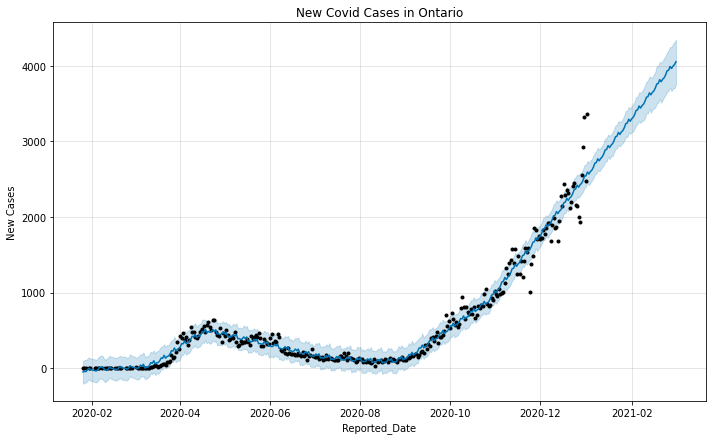

In [69]:
#Plot the forecast of new cases
new_cases_fb.plot(new_cases_forecast, xlabel = 'Reported_Date', ylabel = 'New Cases')
plt.title('New Covid Cases in Ontario')

Text(0.5, 1.0, 'New Deaths from COVID-19 in Ontario')

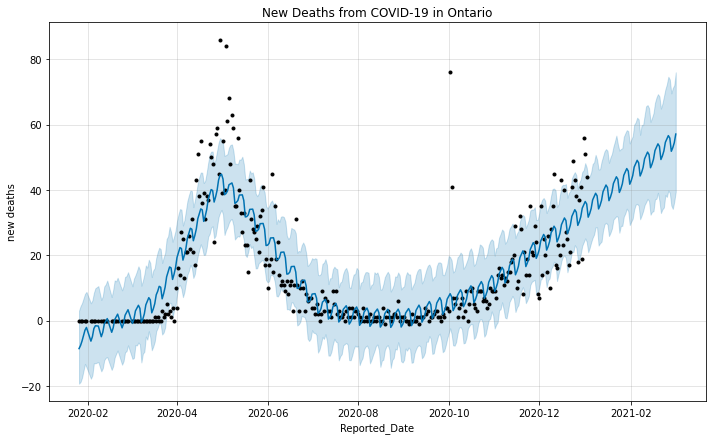

In [70]:
#Plot New Deaths and its predictive
new_deaths_fb.plot(new_deaths_forecast, xlabel = 'Reported_Date', ylabel = 'new deaths')
plt.title('New Deaths from COVID-19 in Ontario')